You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [ ]:
import numpy as np
import seaborn as sns # used for plot interactive graph.

In [ ]:
# Delete this cell if not using google colab

from google.colab import files
files.upload()

{}

In [ ]:
import pandas as pd
# note delimitter for this file is semi-colon (;) not comma
train = pd.read_csv('mushroom_train.csv', delimiter=";")
test = pd.read_csv('mushroom_test.csv', delimiter=';')

In [ ]:
concat = pd.concat([train, test])
concat

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10851,e,52.41,o,y,y,f,p,NaN,y,5.47,...,NaN,k,k,NaN,NaN,f,f,NaN,d,u
10852,e,54.81,o,y,y,f,p,NaN,y,6.67,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s
10853,e,49.95,o,y,y,f,p,NaN,y,6.43,...,NaN,k,n,NaN,NaN,f,f,NaN,d,u
10854,e,53.16,o,y,y,f,p,NaN,y,6.99,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s


# 2. Splitting Data into Features and Labels

In [ ]:
# Only keep features that shroomster can detect!
# remove class feature, because shroomster cannot detect
labels = concat['class']
labels

0        p
1        p
2        p
3        p
4        p
        ..
10851    e
10852    e
10853    e
10854    e
10855    e
Name: class, Length: 61069, dtype: object

In [ ]:
concat = concat.drop('class', axis=1)
concat

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10851,52.41,o,y,y,f,p,NaN,y,5.47,25.02,NaN,k,k,NaN,NaN,f,f,NaN,d,u
10852,54.81,o,y,y,f,p,NaN,y,6.67,22.15,NaN,k,k,NaN,NaN,f,f,NaN,d,s
10853,49.95,o,y,y,f,p,NaN,y,6.43,26.35,NaN,k,n,NaN,NaN,f,f,NaN,d,u
10854,53.16,o,y,y,f,p,NaN,y,6.99,40.29,NaN,k,k,NaN,NaN,f,f,NaN,d,s


# 3. Data Exploration and Visualization (Combined 3/4/5)

In [ ]:
# Hint: We have done this in both project 1 & 2
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
# import matplotlib.pyplot as plt #plotting package

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# convert objects to numerical types
concat['cap-diameter'] = concat['cap-diameter'].astype(np.float64)
concat['stem-height'] = concat['stem-height'].astype(np.float64)
concat['stem-width'] = concat['stem-width'].astype(np.float64)

#split dataframes
train_df = concat.iloc[:50213,:]
test_df = concat.iloc[50213:,:]

#convert objects to categorical
ordinal = OrdinalEncoder()
concat[['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type',
        'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']] = ordinal.fit_transform(concat[['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                                                                                                                          'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
                                                                                                                          'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
                                                                                                                          'ring-type', 'spore-print-color', 'habitat', 'season']])

In [ ]:
train_display = concat.iloc[:50213,:]

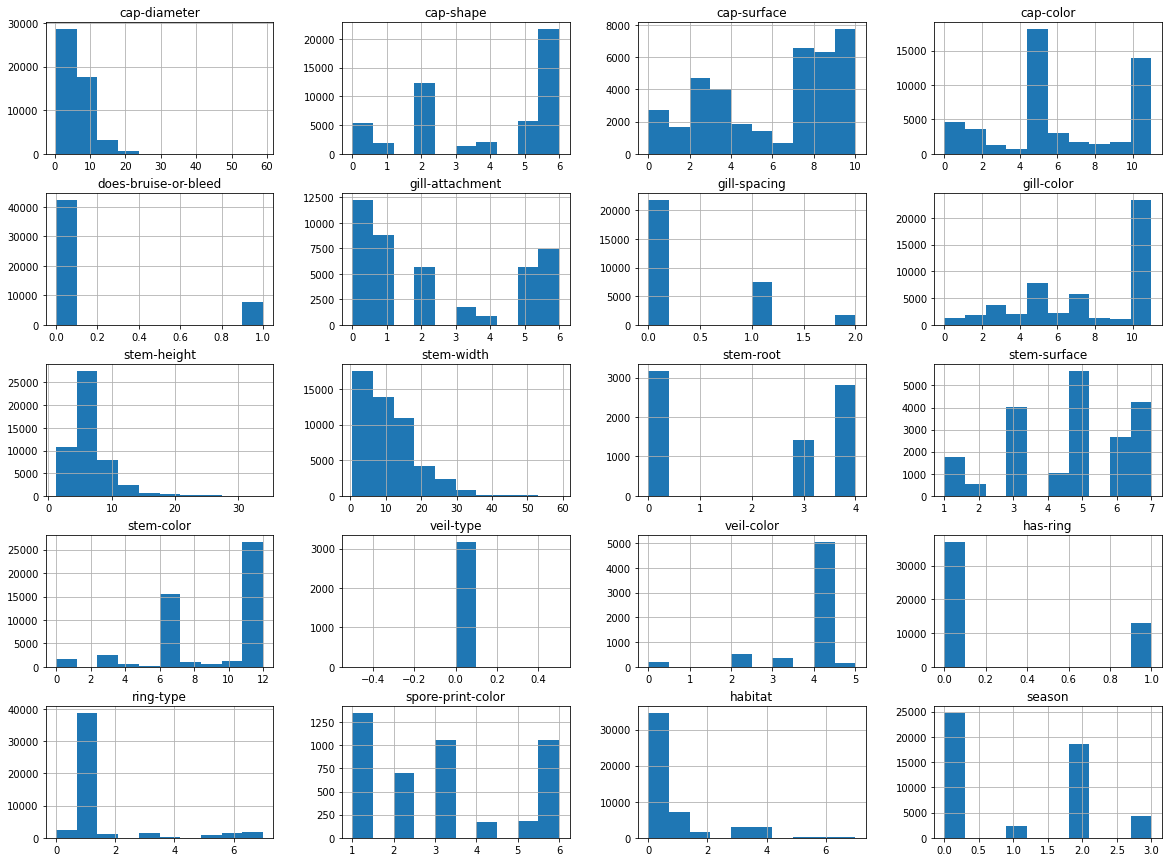

In [ ]:
train_display.hist(bins=10, figsize=(20,15))
plt.show()

<AxesSubplot:>

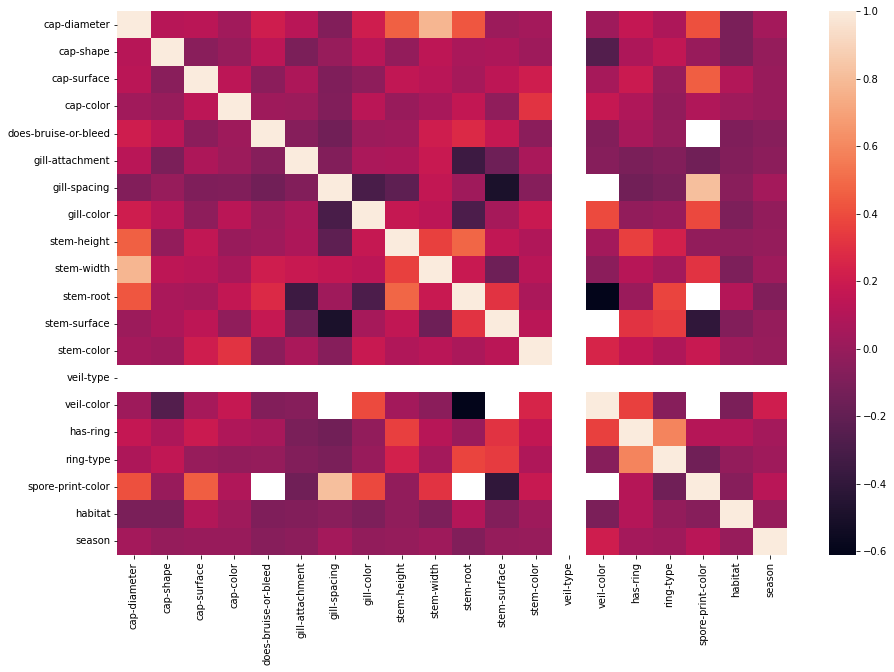

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_display.corr(), ax=ax)

# 5. Data Augmentation (Creating at least 2 New Features)

In [ ]:
# Similar to Project 1 and 2.

#very similar features: stem-width, cap diameter; spore-print-color, gill-spacing;
remove_features = ['veil-type', 'veil-color', 'spore-print-color', 'cap-diameter', 'gill-spacing']
#remove_features = []
train_df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
dtype: int64

In [ ]:
train_df['cap-diam-div-stem-width'] = train_df['cap-diameter']/(train_df['stem-width']+1)
train_df['cap-diam-mult-stem-width'] = train_df['cap-diameter']*train_df['stem-width']
train_df['cap-diam-div-stem-height'] = train_df['cap-diameter']/(train_df['stem-height']+1)
train_df['cap-diam-mult-stem-height'] = train_df['cap-diameter']*train_df['stem-height']
train_df['stem-width-div-stem-height'] = train_df['stem-width']/(train_df['stem-height']+1)
train_df['stem-width-mult-stem-height'] = train_df['stem-width']*train_df['stem-height']
train_df

<ipython-input-15-96afce782580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cap-diam-div-stem-width'] = train_df['cap-diameter']/(train_df['stem-width']+1)
<ipython-input-15-96afce782580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cap-diam-mult-stem-width'] = train_df['cap-diameter']*train_df['stem-width']
<ipython-input-15-96afce782580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,ring-type,spore-print-color,habitat,season,cap-diam-div-stem-width,cap-diam-mult-stem-width,cap-diam-div-stem-height,cap-diam-mult-stem-height,stem-width-div-stem-height,stem-width-mult-stem-height
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,g,NaN,d,w,0.843560,260.7934,0.850139,258.6570,0.952089,289.6755
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,g,NaN,d,u,0.865034,301.9540,0.874144,298.6340,0.957873,327.2381
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,g,NaN,d,w,0.750800,249.6018,0.748404,250.4460,0.943617,315.7720
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,p,NaN,d,w,0.834511,226.4366,0.844961,223.4609,0.952892,252.0046
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,p,NaN,d,w,0.804396,251.8080,0.835140,241.9992,0.981175,284.3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,1.18,s,s,y,f,f,f,f,3.93,6.22,...,f,NaN,d,a,0.163435,7.3396,0.239351,4.6374,1.261663,24.4446
50209,1.27,f,s,y,f,f,f,f,3.18,5.43,...,f,NaN,d,a,0.197512,6.8961,0.303828,4.0386,1.299043,17.2674
50210,1.27,s,s,y,f,f,f,f,3.86,6.37,...,f,NaN,d,u,0.172320,8.0899,0.261317,4.9022,1.310700,24.5882
50211,1.24,f,s,y,f,f,f,f,3.56,5.44,...,f,NaN,d,u,0.192547,6.7456,0.271930,4.4144,1.192982,19.3664


<AxesSubplot:>

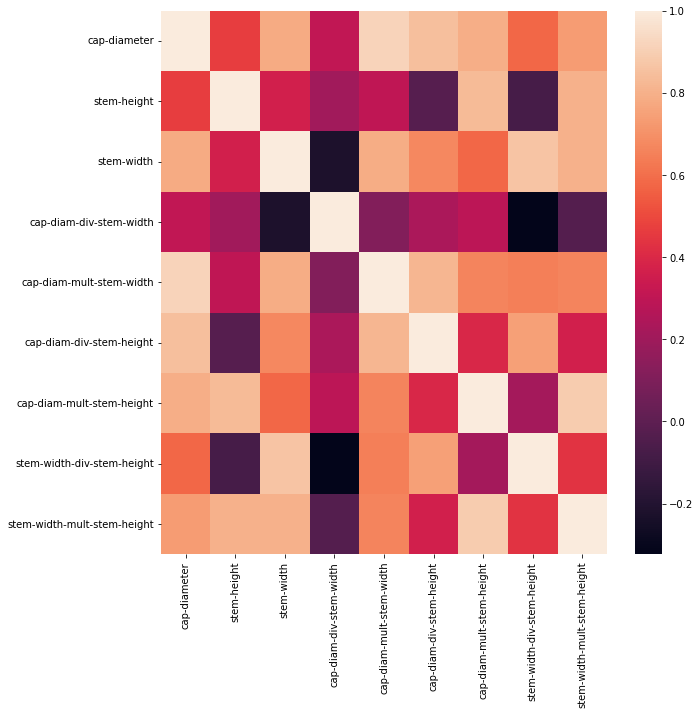

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_df.corr(), ax=ax)

In [ ]:
# keep cap-diameter-div-stem-width and cap-diameter-div-stem-height because they are the most unique
remove_features2 = ['cap-diam-mult-stem-width', 'cap-diam-mult-stem-height', 'stem-width-div-stem-height', 'stem-width-mult-stem-height']
test_df['cap-diam-div-stem-width'] = test_df['cap-diameter']/(test_df['stem-width']+1)
test_df['cap-diam-div-stem-height'] = test_df['cap-diameter']/(test_df['stem-height']+1)

<ipython-input-17-a2d191664da7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cap-diam-div-stem-width'] = test_df['cap-diameter']/(test_df['stem-width']+1)
<ipython-input-17-a2d191664da7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cap-diam-div-stem-height'] = test_df['cap-diameter']/(test_df['stem-height']+1)


# 4. Data Processing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1
converted_labels = labels.replace({'p': 0, 'e': 1})

In [ ]:
# 2. You can drop columns if you see fit
#dropped cap diameter due to high correlation
#consider dropping veil color
features = train_df.drop(remove_features, axis=1)
train_x = features.drop(remove_features2, axis=1)
test_x = test_df.drop(remove_features, axis=1)

<AxesSubplot:>

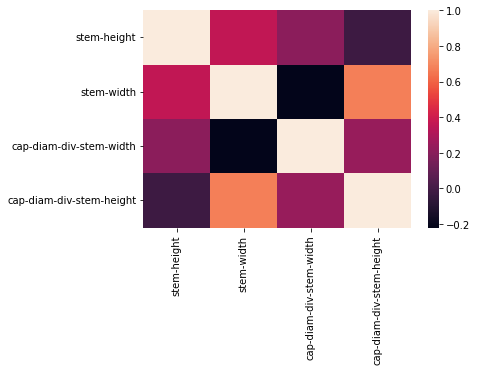

In [ ]:
sns.heatmap(train_x.corr())
#features are pretty good

In [ ]:
# 3. See any incomplete data? We learned how to deal with them in project 1.
train_x.isnull().sum()

cap-shape                       0
cap-surface                 12298
cap-color                       0
does-bruise-or-bleed            0
gill-attachment              7766
gill-color                      0
stem-height                     0
stem-width                      0
stem-root                   42800
stem-surface                30301
stem-color                      0
has-ring                        0
ring-type                    1765
habitat                         0
season                          0
cap-diam-div-stem-width         0
cap-diam-div-stem-height        0
dtype: int64

In [ ]:
nulled_features = ['stem-root']
train_x2 = train_x.drop(nulled_features, axis=1)
test_x2 = test_x.drop(nulled_features, axis=1)
train_x2.dropna()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season,cap-diam-div-stem-width,cap-diam-div-stem-height
0,x,g,o,f,e,w,16.95,17.09,y,w,t,g,d,w,0.843560,0.850139
1,x,g,o,f,e,w,17.99,18.19,y,w,t,g,d,u,0.865034,0.874144
2,x,g,o,f,e,w,17.80,17.74,y,w,t,g,d,w,0.750800,0.748404
3,f,h,e,f,e,w,15.77,15.98,y,w,t,p,d,w,0.834511,0.844961
4,x,h,o,f,e,w,16.53,17.20,y,w,t,p,d,w,0.804396,0.835140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48443,f,k,n,f,p,n,3.83,5.94,k,n,t,f,d,u,0.940922,1.351967
48444,s,k,n,f,p,n,4.32,7.18,k,n,t,f,d,u,0.707824,1.088346
48445,f,k,y,f,p,n,3.72,5.76,k,n,t,f,d,u,0.659763,0.944915
48446,s,k,y,f,p,n,4.41,5.35,k,n,t,f,d,u,0.870866,1.022181


In [ ]:
X_train, X_test, y_train, y_test = train_x2, test_x2, converted_labels.iloc[:50213], converted_labels.iloc[50213:]

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(50213, 16) (50213,)
(10856, 16) (10856,)


In [ ]:
numerical_features = ['stem-height', 'stem-width', 'cap-diam-div-stem-width', 'cap-diam-div-stem-width']
categorical_features = ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'habitat', 'season']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ])

prep_train = full_pipeline.fit_transform(X_train).toarray()
prep_test = full_pipeline.transform(X_test).toarray()

# 6.  Logistic Regression & Statistical Hypothesis Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(prep_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predicted_log = log_reg.predict(prep_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted_log)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predicted_log)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predicted_log)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, predicted_log)))

Accuracy:    0.437638
Precision:   0.513827
Recall:      0.314171
F1:          0.389927


In [ ]:
import statsmodels.api as sm

stats_data = train_df[['stem-height', 'stem-width', 'cap-diam-div-stem-width', 'cap-diam-div-stem-height']]
stats_data

,stem-height,stem-width,cap-diam-div-stem-width,cap-diam-div-stem-height
0,16.95,17.09,0.843560,0.850139
1,17.99,18.19,0.865034,0.874144
2,17.80,17.74,0.750800,0.748404
3,15.77,15.98,0.834511,0.844961
4,16.53,17.20,0.804396,0.835140
...,...,...,...,...
50208,3.93,6.22,0.163435,0.239351
50209,3.18,5.43,0.197512,0.303828
50210,3.86,6.37,0.172320,0.261317
50211,3.56,5.44,0.192547,0.271930


In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
50208    0
50209    0
50210    0
50211    0
50212    0
Name: class, Length: 50213, dtype: int64

In [ ]:
sm_x = sm.add_constant(stats_data)
logit_mod = sm.Logit(y_train, sm_x)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.666947
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                50213
Model:                          Logit   Df Residuals:                    50208
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                 0.01850
Time:                        23:06:08   Log-Likelihood:                -33489.
converged:                       True   LL-Null:                       -34121.
Covariance Type:            nonrobust   LLR p-value:                4.323e-272
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2328      0.038    -32.352      0.000      -1.307

# 7. Dimensionality Reduction using PCA



In [ ]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
prep_train.shape

(50213, 63)

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components=5)
pca_train = pca.fit_transform(prep_train)
pca_train.shape

(50213, 5)

In [ ]:
log_reg.fit(pca_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
log_reg.fit(pca_train, y_train)
pca_test = pca.transform(prep_test)
predicted_pca = log_reg.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predicted_pca)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predicted_pca)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predicted_pca)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, predicted_pca)))

Accuracy:    0.445007
Precision:   0.524819
Recall:      0.314976
F1:          0.393680


# 8. Experiment with any 2 other models (Non-Ensemble)

In [ ]:
# Models: https://scikit-learn.org/stable/supervised_learning.html
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10001)
neigh.fit(pca_train, y_train)
neigh_predicted = neigh.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, neigh_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, neigh_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, neigh_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, neigh_predicted)))

Accuracy:    0.611551
Precision:   0.725606
Recall:      0.516103
F1:          0.603181


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(pca_train, y_train)
tree_predicted = tree.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, tree_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, tree_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, tree_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, tree_predicted)))

Accuracy:    0.571942
Precision:   0.650607
Recall:      0.543639
F1:          0.592333


# 9. Experiment with 1 Ensemble Method

In [ ]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=15)
forest.fit(pca_train, y_train)
forest_predicted = forest.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, forest_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, forest_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, forest_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, forest_predicted)))

Accuracy:    0.591194
Precision:   0.766386
Recall:      0.410467
F1:          0.534606


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [ ]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 10, random_state=42, shuffle=True)

knn_clf = KNeighborsClassifier()
knn_results = cross_val_score(knn_clf, pca_train, y_train, cv=kf)
print("KNN CV Accuracy: %.2f%%" % (knn_results.mean()*100.0))

tree_clf = DecisionTreeClassifier()
tree_results = cross_val_score(tree_clf, pca_train, y_train, cv=kf)
print("Decision Tree CV Accuracy: %.2f%%" % (tree_results.mean()*100.0))

forest_clf = RandomForestClassifier()
forest_results = cross_val_score(forest_clf, pca_train, y_train, cv=kf)
print("Decision Tree CV Accuracy: %.2f%%" % (forest_results.mean()*100.0))

KNN CV Accuracy: 92.52%
Decision Tree CV Accuracy: 90.66%
Decision Tree CV Accuracy: 95.21%


In [ ]:
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html
from sklearn.model_selection import GridSearchCV

knn_params = [
    { 'n_neighbors': [5, 55, 555, 5555],
     'weights': ['uniform', 'distance'],
     'algorithm': ['brute', 'kd_tree', 'ball_tree', 'auto']
    }
]
knn_clf_grid = GridSearchCV(estimator=knn_clf, param_grid=knn_params, cv=kf, verbose=True)
knn_clf_grid.fit(pca_train, y_train)
print(knn_clf_grid.best_estimator_.get_params())

Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [ ]:
tree_params = [
    { 'max_depth': [2, 5, 8],
     'criterion': ['gini', 'entropy', 'log_loss'],
    }
]
tree_clf_grid = GridSearchCV(estimator=tree_clf, param_grid=tree_params, cv=kf, verbose=True)
tree_clf_grid.fit(pca_train, y_train)
print(tree_clf_grid.best_estimator_.get_params())

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
forest_params = [
    { 'n_estimators': [1, 5, 15],
     'max_features': [None, 1.0],
    }
]
forest_clf_grid = GridSearchCV(estimator=forest_clf, param_grid=forest_params, cv=kf, verbose=True)
forest_clf_grid.fit(pca_train, y_train)
print(forest_clf_grid.best_estimator_.get_params())

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# 11. Report Final Results

In [ ]:
# e.g. Accuracy, Precision etc.
final_neigh = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='distance')
final_neigh.fit(pca_train, y_train)
final_neigh_predicted = final_neigh.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, final_neigh_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, final_neigh_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, final_neigh_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, final_neigh_predicted)))

Accuracy:    0.462878
Precision:   0.540535
Recall:      0.406924
F1:          0.464309


In [ ]:
final_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=8, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')
final_tree.fit(pca_train, y_train)
final_tree_predicted = final_tree.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, final_tree_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, final_tree_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, final_tree_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, final_tree_predicted)))

Accuracy:    0.506448
Precision:   0.638492
Recall:      0.316264
F1:          0.423002


In [ ]:
final_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None,
                                      max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
                                      oob_score=False, random_state=None, warm_start=False)
final_forest.fit(pca_train, y_train)
final_forest_predicted = final_forest.predict(pca_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, final_forest_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, final_forest_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, final_forest_predicted)))
print("%-12s %f" % ('F1:', metrics.f1_score(y_test, final_forest_predicted)))

Accuracy:    0.545965
Precision:   0.690116
Recall:      0.374396
F1:          0.485437
